In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
my_data=pd.read_csv("Admission_Predict.csv")
my_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
my_data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
my_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

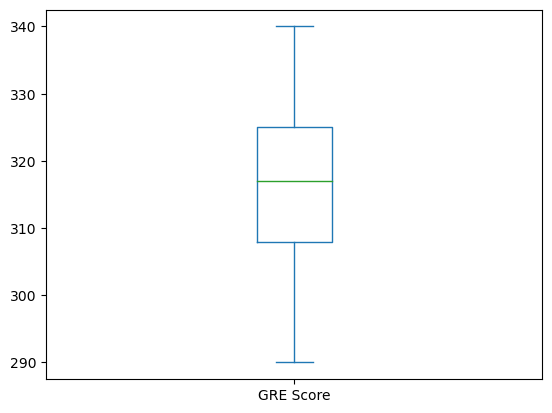

In [5]:
my_data["GRE Score"].plot.box()

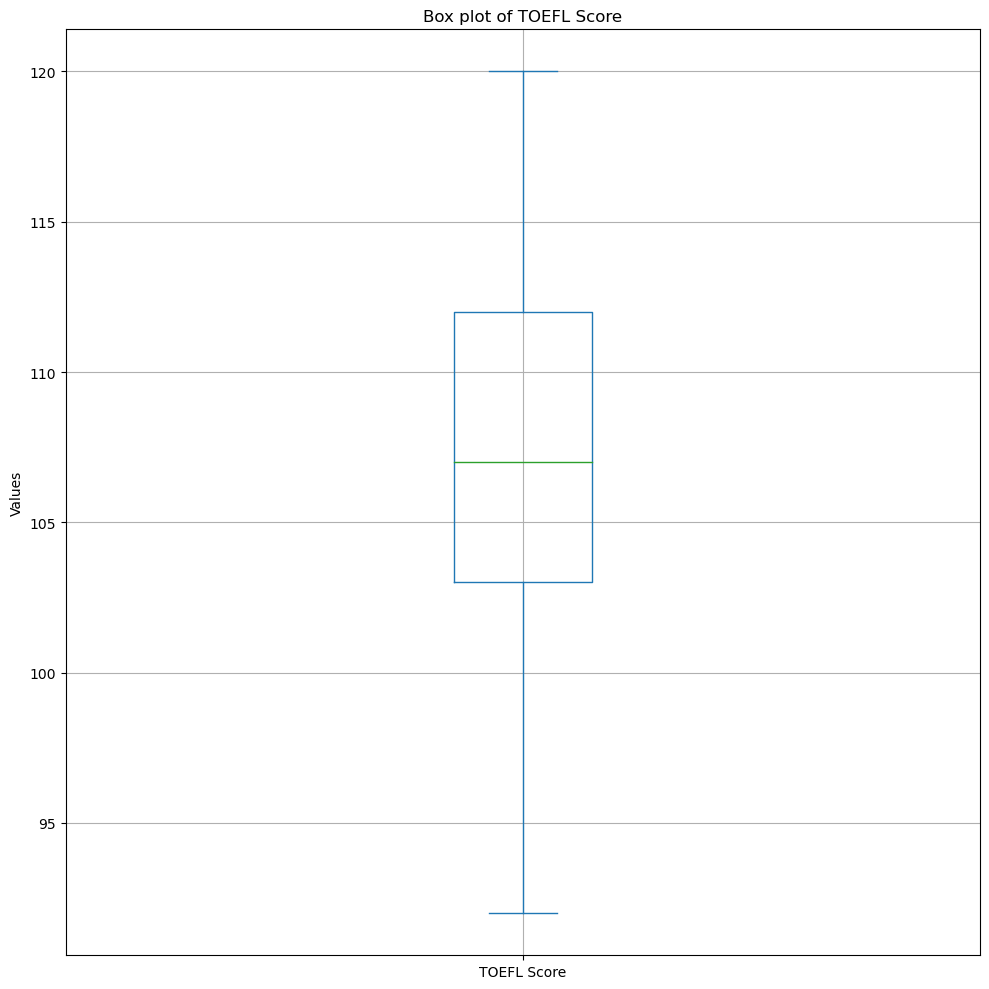

In [6]:
plt.figure(figsize=(10,10))
my_data["TOEFL Score"].plot(kind="box")
plt.title(f"Box plot of TOEFL Score")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()

In [7]:
import matplotlib.pyplot as plt

In [8]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
def box_plot(col):
    plt.figure()
    my_data[col].plot(kind="box")
    plt.title(f"Box plot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

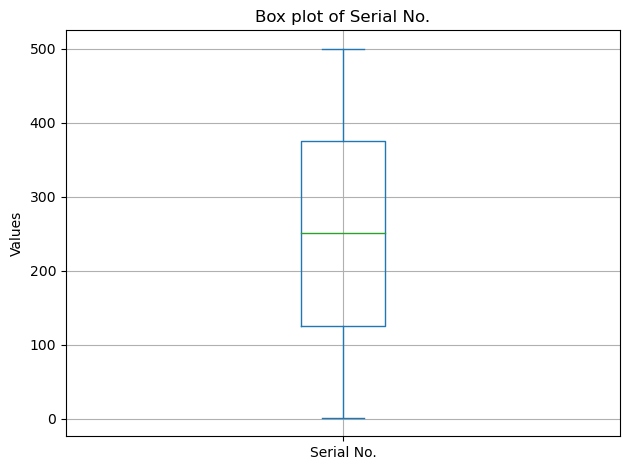

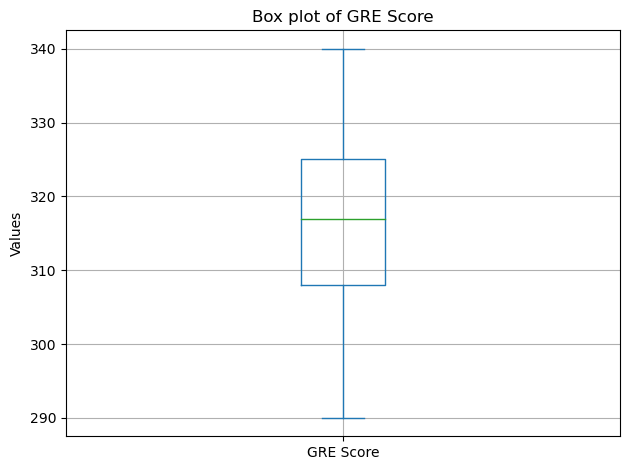

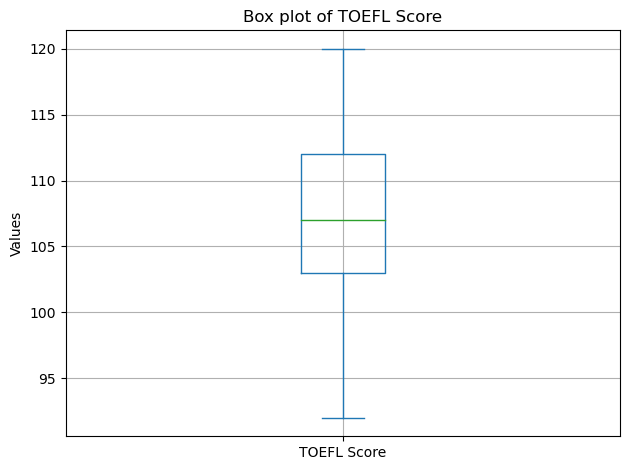

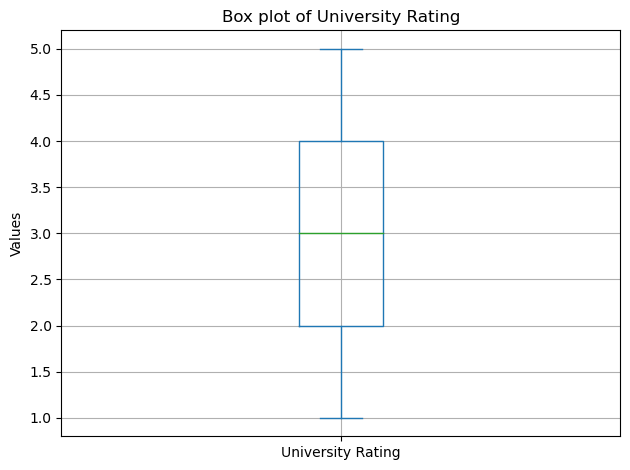

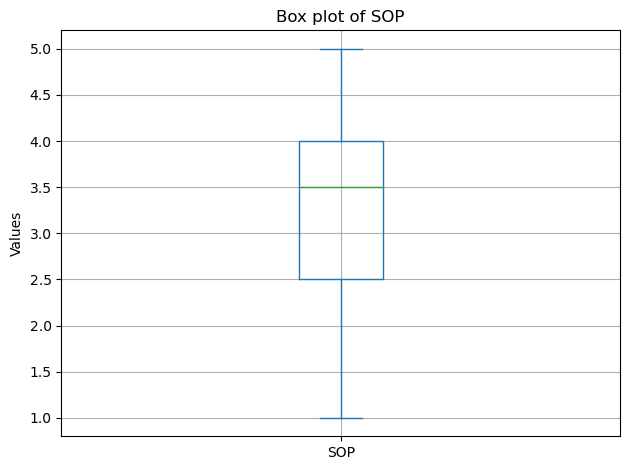

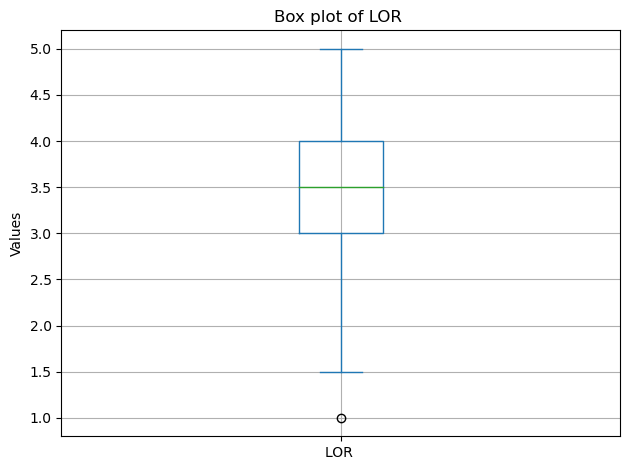

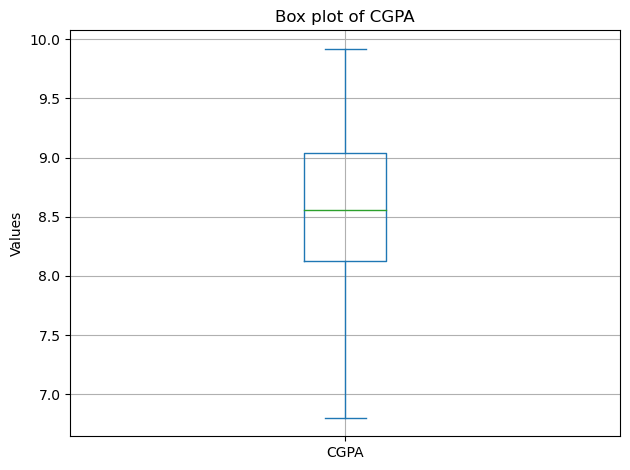

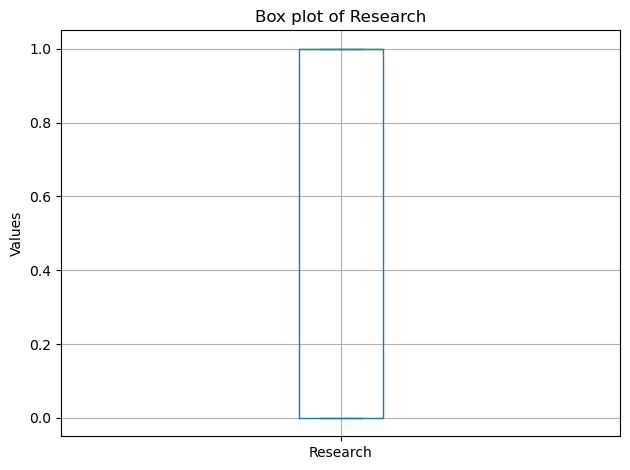

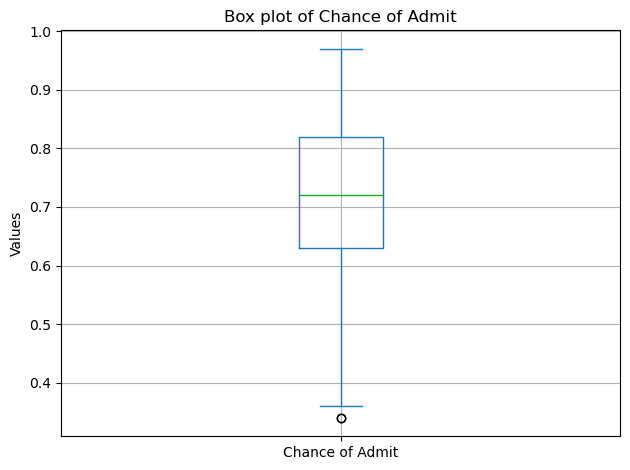

In [10]:
for col in my_data.columns:
    box_plot(col)

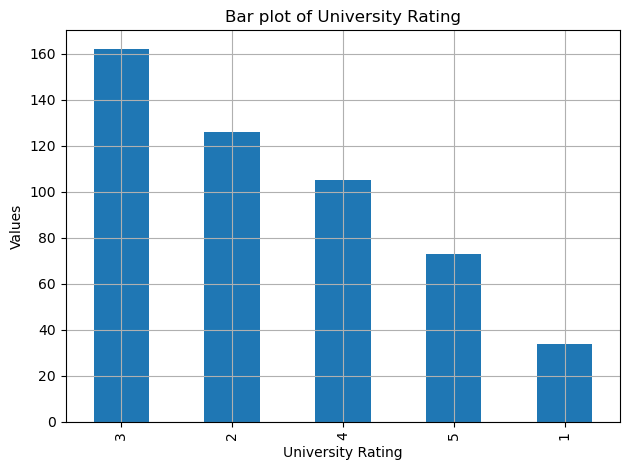

In [11]:
my_data["University Rating"].value_counts().plot(kind="bar")
plt.ylabel("Values")
plt.title(f"Bar plot of University Rating")
plt.tight_layout()
plt.grid()
plt.show()

In [12]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
def bar_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"Bar plot of {col}")
    plt.xticks(fontsize=10)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

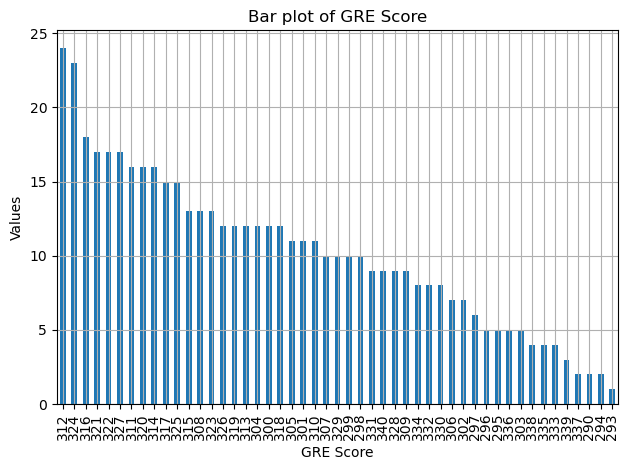

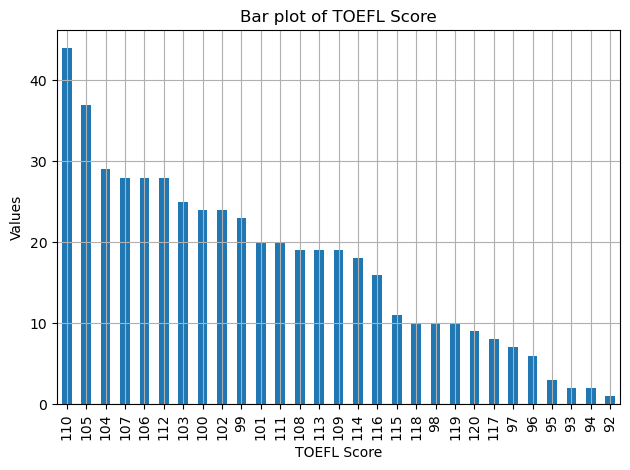

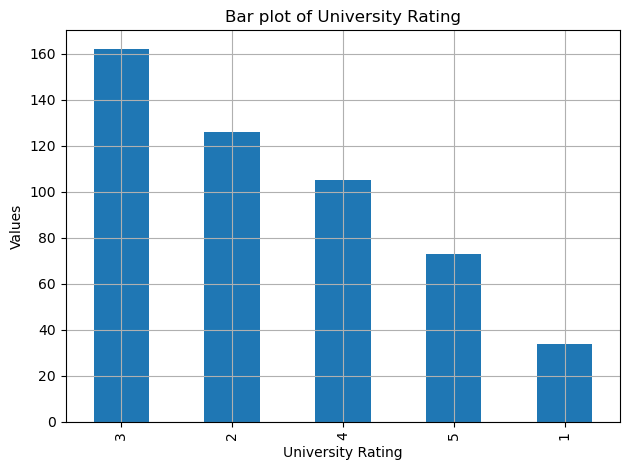

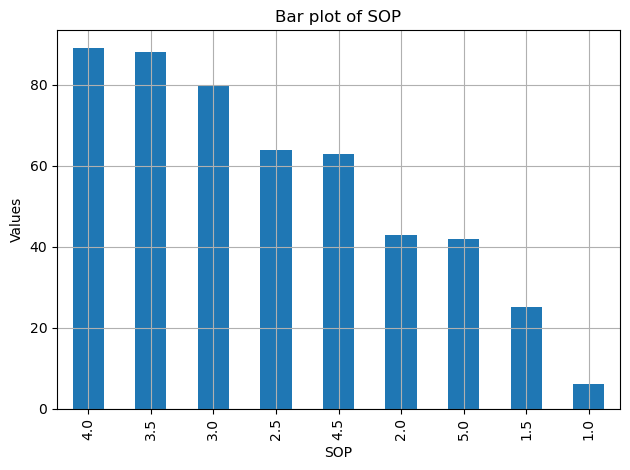

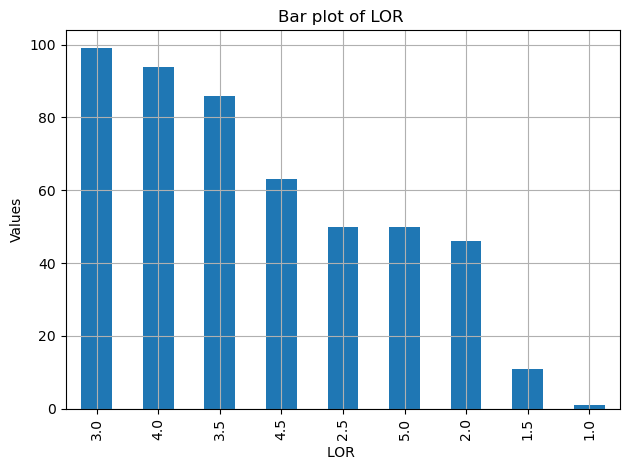

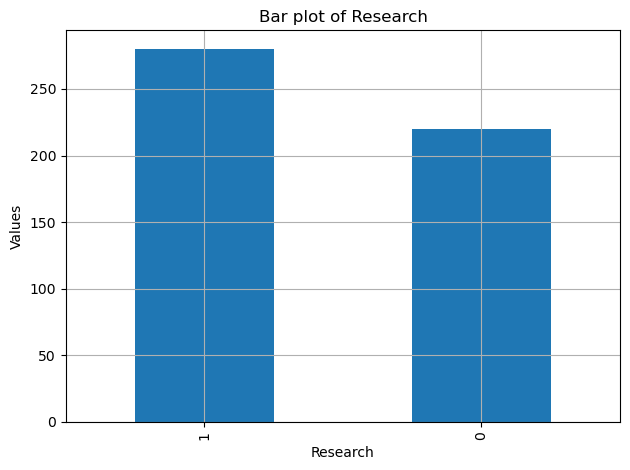

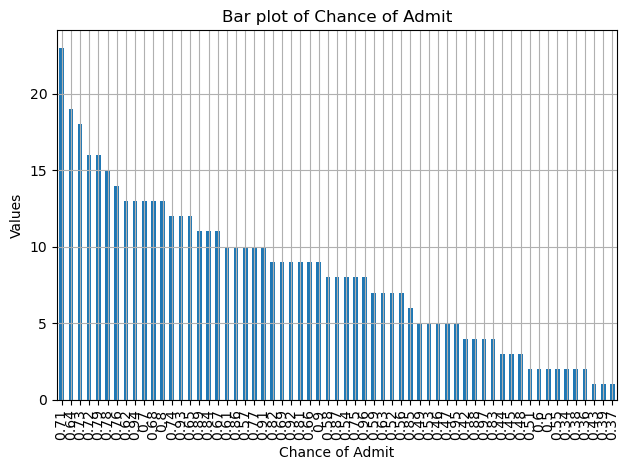

In [14]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'Research', 'Chance of Admit']:
    bar_plot(col)

In [15]:
def line_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="line",rot=90)
    plt.title(f"line plot of {col}")
    plt.xticks(fontsize=10)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

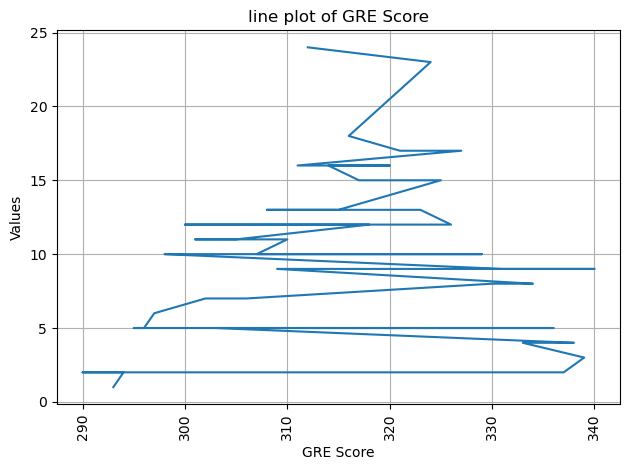

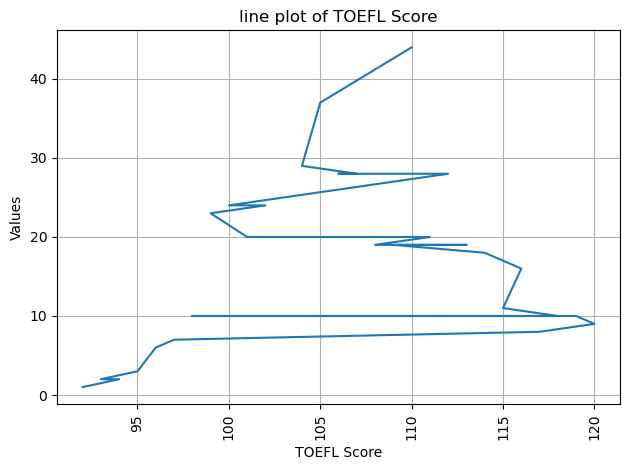

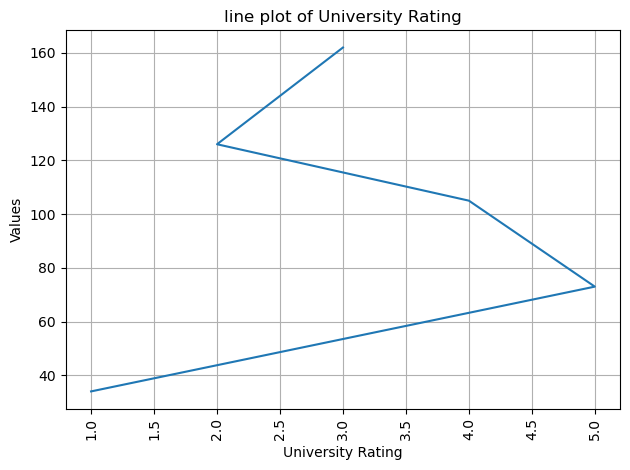

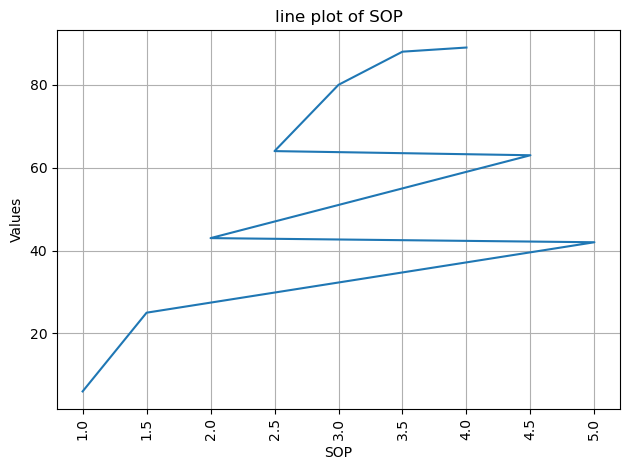

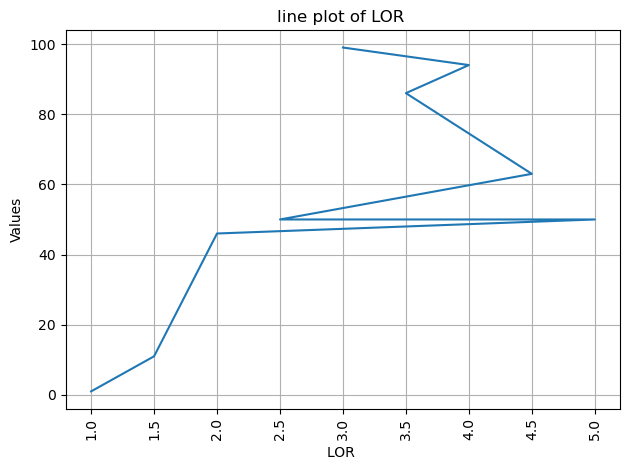

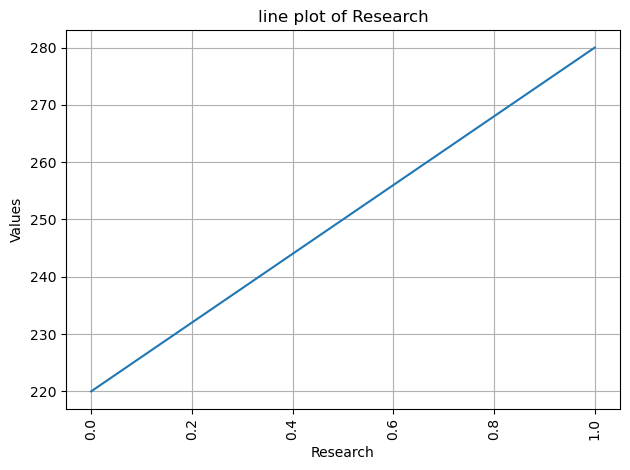

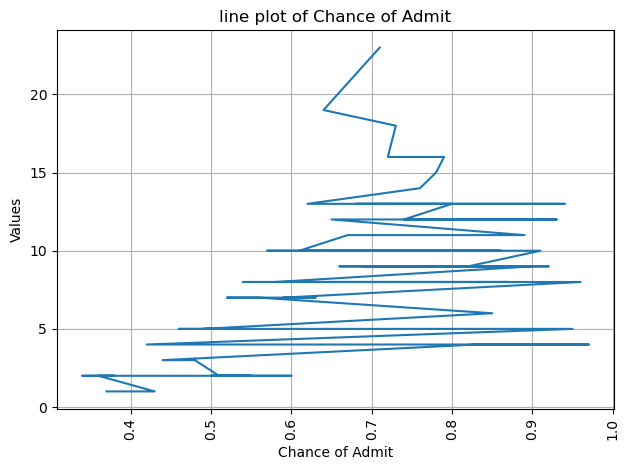

In [16]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'Research', 'Chance of Admit']:
    line_plot(col)

In [17]:
y=my_data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [18]:
x=my_data.drop(["Serial No.","Chance of Admit"],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12345,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

x_train (375, 7)
y_train (375,)
x_test (125, 7)
y_test (125,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [23]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.46747059, 0.7043113 , 0.52008333, 0.74113125, 0.71212995,
       0.80968438, 0.70842694, 0.91010864, 0.6628263 , 0.71276975,
       0.87306685, 0.61649745, 0.79162591, 0.87751638, 0.51359588,
       0.952002  , 0.60720274, 0.8372675 , 0.73063946, 0.66811838,
       0.417752  , 0.95979996, 0.5733307 , 0.78932568, 0.85283291,
       0.94529043, 0.64644657, 0.7394248 , 0.68939497, 0.65411306,
       0.54811385, 0.71604359, 0.82898346, 0.93917809, 0.8686401 ,
       0.67507883, 0.99798533, 0.52153907, 0.83700555, 0.53382617,
       0.63586088, 0.60456203, 0.68990108, 0.76509947, 0.91354168,
       0.58163047, 0.78955587, 0.63446231, 0.91075092, 0.72635878,
       0.80513161, 0.45854501, 0.73267841, 0.64810875, 0.71834853,
       0.65620164, 0.88345771, 0.9031338 , 0.57787433, 0.67385742,
       0.76931238, 0.60420352, 0.50341024, 0.79612877, 0.64078567,
       0.81125366, 0.64290368, 0.78193113, 0.80754843, 0.84496093,
       0.86327347, 0.75801761, 0.61870212, 0.84555219, 0.61710

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean square error is {mse}")
rmse=sqrt(mse)
print(f"Root mean squared error is {rmse}")

Mean square error is 0.003757269334387731
Root mean squared error is 0.061296568699950336


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [28]:
select_models=[LinearRegression(),
             DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
             RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [29]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model{model}")
    print(f"List of Rmse {my_rmse}")
    print("--------------------")
    print(f"List of R square {my_r_square}")
    adj_r_square_test= 1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r_square_test")
    adj_r2_square_value.append(adj_r_square_test)
    print(f"Adjusted R Square {adj_r2_square_value} of model {model}")
    print("----------------")
    print(f"Adjusted R Square {adj_r2_square_value}")

RMSE value [0.061296568699950336] and R Squared value [0.7867516752498763] of modelLinearRegression()
List of Rmse [0.061296568699950336]
--------------------
List of R square [0.7867516752498763]
LinearRegression(),adj_r_square_test
Adjusted R Square [0.7739932284699544] of model LinearRegression()
----------------
Adjusted R Square [0.7739932284699544]
RMSE value [0.061296568699950336, 0.08559033564343323] and R Squared value [0.7867516752498763, 0.6509340715563533] of modelDecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.061296568699950336, 0.08559033564343323]
--------------------
List of R square [0.7867516752498763, 0.6509340715563533]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r_square_test
Adjusted R Square [0.7739932284699544, 0.6300497852392121] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
----------------
Adjusted R Square [0.7739932284699544, 0.6300497852392121]
RMSE value [0.061296568699950336

In [30]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.061296568699950336, 0.08559033564343323, 0.06558446553329053],
 [0.7867516752498763, 0.6509340715563533, 0.7574304072684179],
 [0.7739932284699544, 0.6300497852392121, 0.7429176965921694]]

In [31]:
a=pd.DataFrame(data=result,columns=["LR","DTR","RF"],index=["rmse","R square","Adjusted R Square"])
a

,LR,DTR,RF
rmse,0.061297,0.085590,0.065584
R square,0.786752,0.650934,0.757430
Adjusted R Square,0.773993,0.630050,0.742918


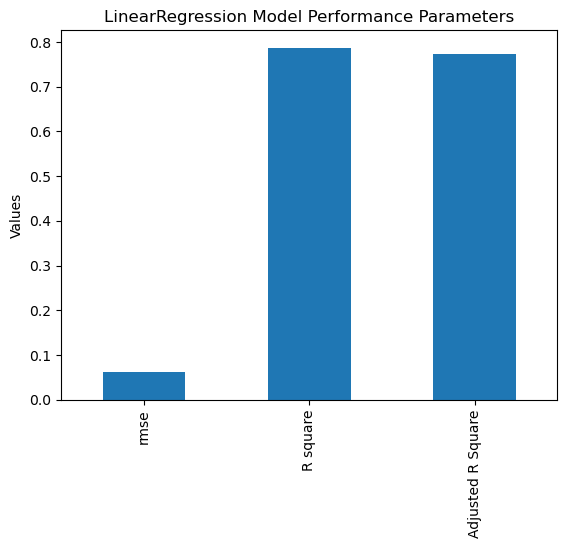

In [32]:
a.LR.plot(kind='bar')
plt.title('LinearRegression Model Performance Parameters')
plt.ylabel('Values')
plt.show()

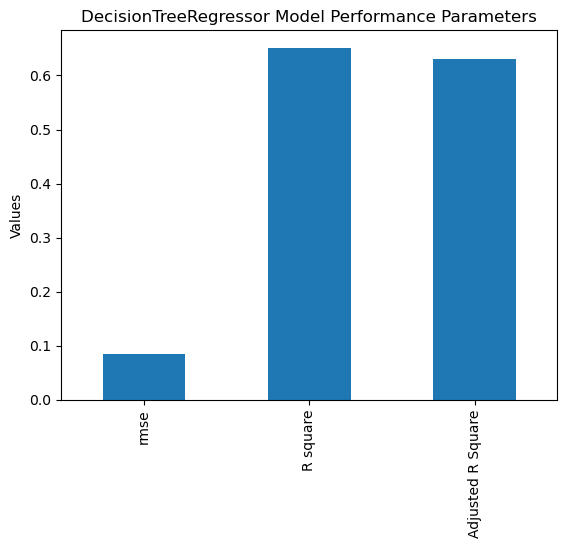

In [33]:
a.DTR.plot(kind='bar')
plt.title('DecisionTreeRegressor Model Performance Parameters')
plt.ylabel('Values')
plt.show()

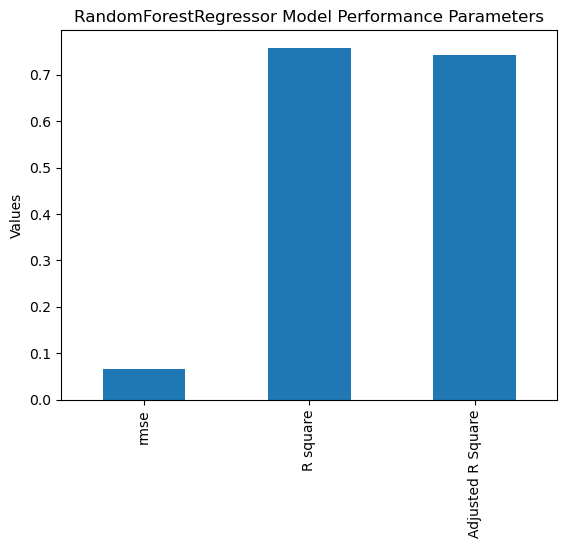

In [34]:
a.RF.plot(kind='bar')
plt.title('RandomForestRegressor Model Performance Parameters')
plt.ylabel('Values')
plt.show()

In [35]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Model Performance Graph {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

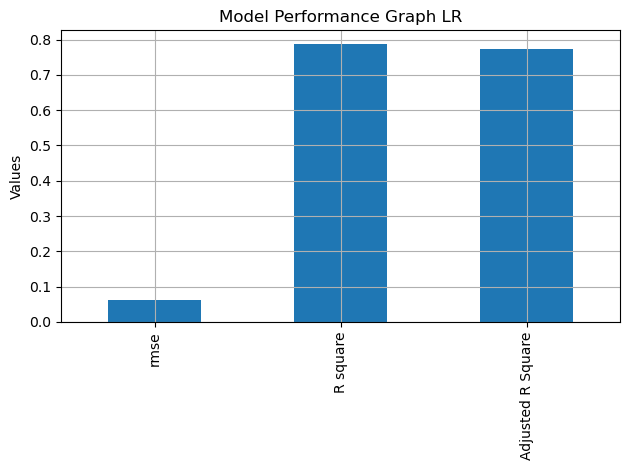

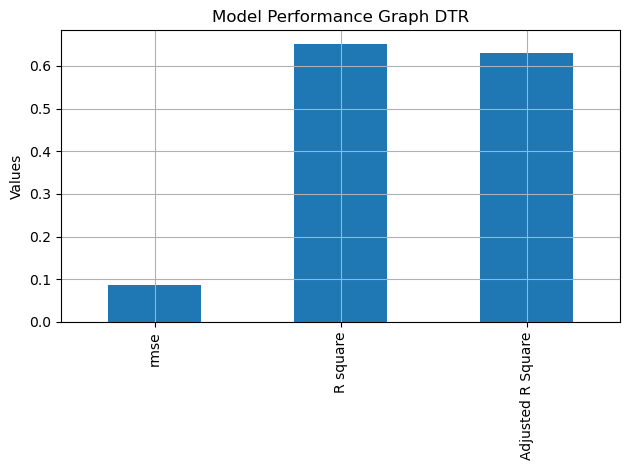

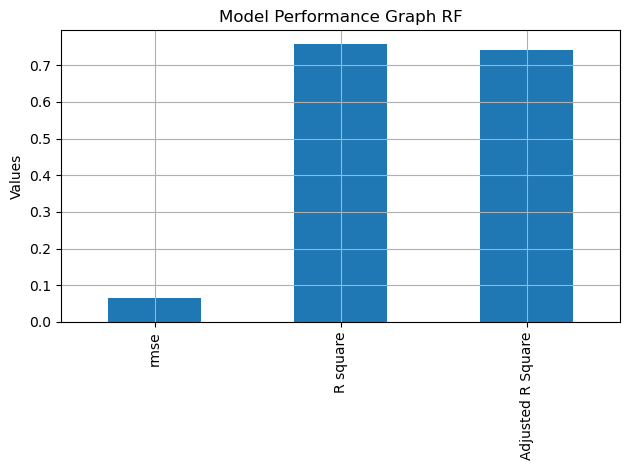

In [36]:
for col in a.columns:
    my_model_plot(col)